In [1]:
from keras.api import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import visualkeras

In [3]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[:10_000]
y_train = y_train[:10_000]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 40)        20040     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 40)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4000)              0         
                                                                 
 dense (Dense)               (None, 128)               512128    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

2022-07-12 09:14:09.048841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F AVX512_VNNI
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


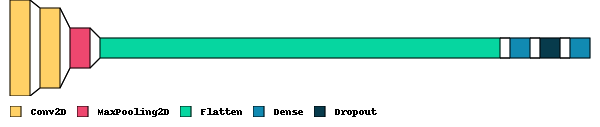

In [4]:
model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=(28, 28, 1)),
        keras.layers.Conv2D(
            filters=20,
            kernel_size=(5, 5),
            activation=tensorflow.nn.relu,
        ),
        keras.layers.Conv2D(
            filters=40,
            kernel_size=(5, 5),
            activation=tensorflow.nn.relu,
        ),
        keras.layers.MaxPool2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation=tensorflow.nn.relu, kernel_regularizer='l2'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10),
    ]
)
model.summary()
visualkeras.layered_view(model, draw_volume=False, legend=True)

In [5]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [6]:
model.fit(
    x_train,
    y_train,
    epochs=2,
    batch_size=32,
)

Epoch 1/2
313/313 [==============================] - 22s 68ms/step - loss: 0.8498 - accuracy: 0.8857
Epoch 2/2
313/313 [==============================] - 22s 71ms/step - loss: 0.3465 - accuracy: 0.9521


In [7]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 4s - loss: 0.2890 - accuracy: 0.9624 - 4s/epoch - 13ms/step


[0.28896141052246094, 0.9624000191688538]

In [8]:
probability_model = keras.Sequential(
    [
        model, keras.layers.Softmax()
    ]
)
predictions = probability_model.predict(x_test)

313/313 [==============================] - 4s 12ms/step


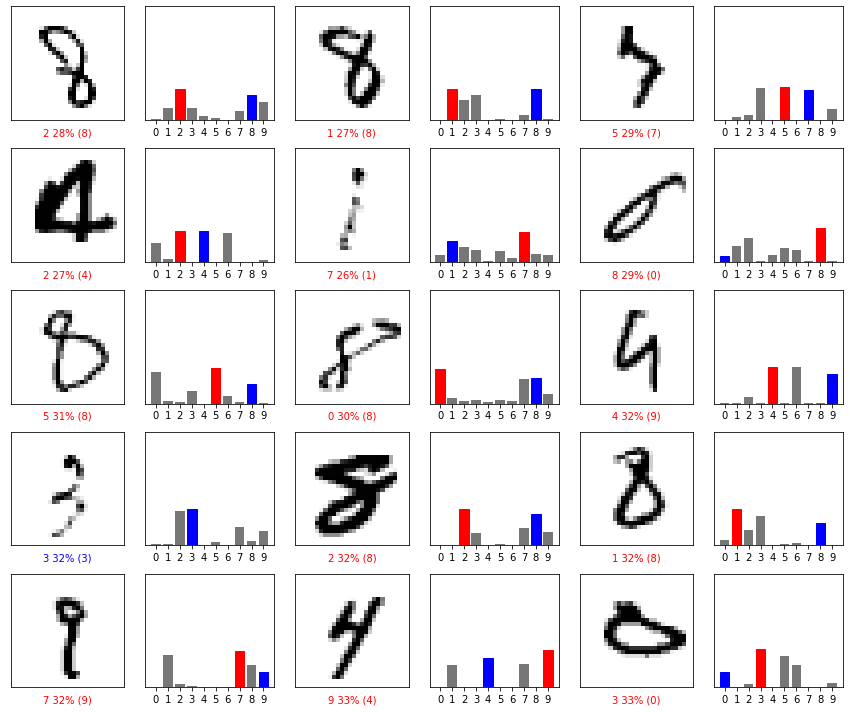

In [45]:
from tf_keras import plot_image, plot_value_array

# Plot the first num_rows*num_cols test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

N = num_cols * num_rows
worst_rank = np.argpartition(np.max(predictions, axis=1), N)[:N]
worst_predictions = predictions[worst_rank]
worst_x = x_test[worst_rank]
worst_y = y_test[worst_rank]

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, worst_predictions[i], worst_y[i], worst_x[i])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, worst_predictions[i], worst_y[i])

plt.tight_layout()
plt.show()
